### MKTG 6264 Assignment 2 Submission

Paul Gimeno

pgimeno@gwu.edu

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Titanic_age-class_stats.csv')

### 1. Data pre-preprocessing

removing columns outside of the 2 classes which are Class and age_calc

In [46]:
print('old columns: ' , df.columns)
#column cleanup
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print('new columns: ',df.columns)

old columns:  Index(['Class', 'age_calc', 'Prob_death'], dtype='object')
new columns:  Index(['Class', 'age_calc', 'Prob_death'], dtype='object')


### Summary stats on the dataset

In [47]:
df.describe()

,Class,age_calc,Prob_death
count,183.000000,182.000000,183.000000
mean,2.016393,32.099817,0.571275
std,0.815209,19.230769,0.354642
min,1.000000,0.166667,0.000000
25%,1.000000,17.000000,0.309524
50%,2.000000,32.000000,0.600000
75%,3.000000,47.750000,0.966666
max,3.000000,71.000000,1.000000


### 2. Analysis of key determinants of dying in the Titanic

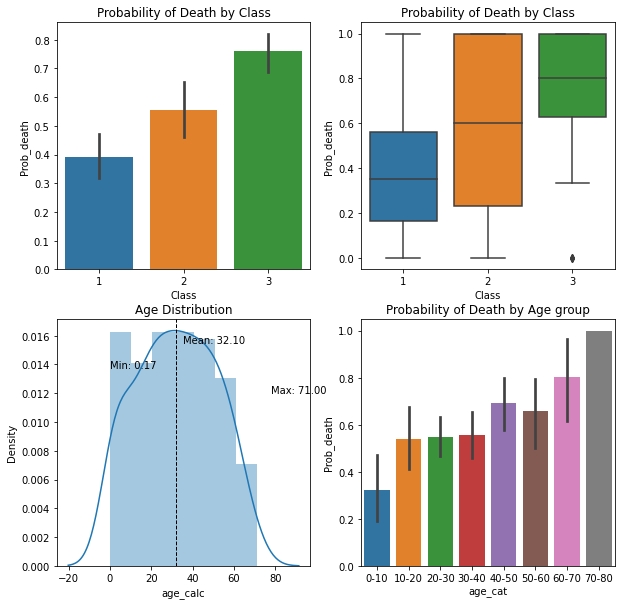

In [48]:
#setting up our plots for analysis
fig, ax = plt.subplots(2,2, figsize=(10,10))

#plot 1
sns.barplot(x='Class', y='Prob_death', data=df, ax=ax[0,0])
ax[0,0].set_title('Probability of Death by Class')

#plot 2 boxplot
sns.boxplot(x='Class', y='Prob_death', data=df, ax=ax[0,1]);
ax[0,1].set_title('Probability of Death by Class');

#plot 3 histogram of age_calc to understand our age distribution
sns.distplot(df['age_calc'], ax=ax[1,0]);
ax[1,0].set_title('Age Distribution');
# mean line
ax[1,0].axvline(df['age_calc'].mean(), color='k', linestyle='dashed', linewidth=1);
# mean value
min_ylim, max_ylim = ax[1,0].get_ylim()
ax[1,0].text(df['age_calc'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['age_calc'].mean()));

#min value label
ax[1,0].text(df['age_calc'].min()*1.1, max_ylim*0.8, 'Min: {:.2f}'.format(df['age_calc'].min()));

#max value label
ax[1,0].text(df['age_calc'].max()*1.1, max_ylim*0.7, 'Max: {:.2f}'.format(df['age_calc'].max()));

# categorical age variable based on distribution
df['age_cat'] = pd.cut(df['age_calc'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']);

#plot 4
sns.barplot(x='age_cat', y='Prob_death', data=df, ax=ax[1,1])
ax[1,1].set_title('Probability of Death by Age group');


### 3. Findings

1. It can be seen in our upper 2 plots that the probability of death in the Titanic increases the lower the class (higher class number) and the higher the age group in general. We can infer that higher class passengers were given priority to resources for evacuation such as lifeboats.
2. We can infer from the distribution of the age groups and the probability of them surviving that the younger passengers were given priority in the evacuation.